<a href="https://colab.research.google.com/github/tanishkabajaj/Deep_Learning/blob/main/Deep_Learning_(SGD_VS_Adam_Optimizer).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Training with SGD Optimizer:
Epoch 1/50 - SGD Loss: 1.0114
Epoch 10/50 - SGD Loss: 0.9106
Epoch 20/50 - SGD Loss: 0.8827
Epoch 30/50 - SGD Loss: 0.8546
Epoch 40/50 - SGD Loss: 0.8245
Epoch 50/50 - SGD Loss: 0.7947

Training with Adam Optimizer:
Epoch 1/50 - Adam Loss: 1.0952
Epoch 10/50 - Adam Loss: 0.8658
Epoch 20/50 - Adam Loss: 0.7894
Epoch 30/50 - Adam Loss: 0.7124
Epoch 40/50 - Adam Loss: 0.6399
Epoch 50/50 - Adam Loss: 0.5754


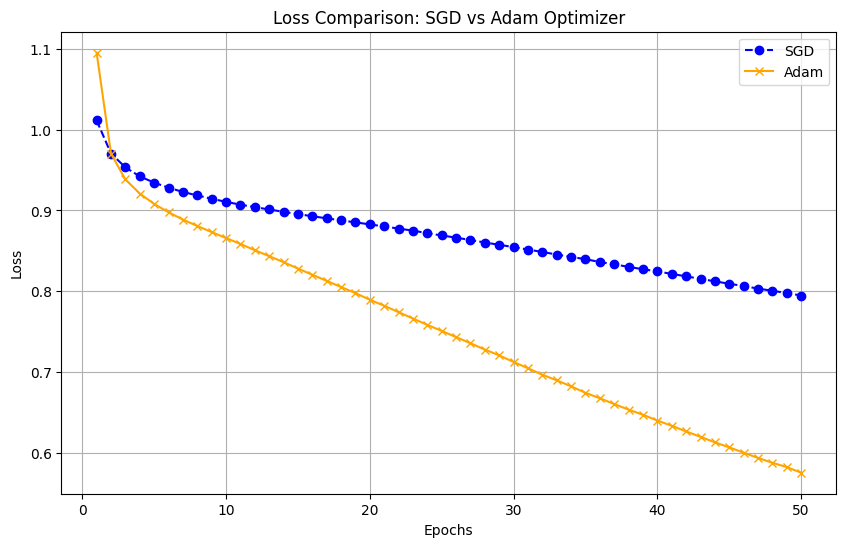

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers
import numpy as np
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

def create_data(samples=1000, features=10):
    X = np.random.randn(samples, features)
    y = np.random.randn(samples, 1)
    return X, y

def create_model(input_shape=10, hidden_layers=[50, 20], output_units=1):
    model = models.Sequential()
    model.add(layers.Dense(hidden_layers[0], activation='relu', input_shape=(input_shape,)))

    for units in hidden_layers[1:]:
        model.add(layers.Dense(units, activation='relu'))

    model.add(layers.Dense(output_units))
    return model

def train_model(model, optimizer, X, y, batch_size=32, epochs=50, optimizer_name="Optimizer", display_interval=10):
    model.compile(optimizer=optimizer, loss='mean_squared_error')
    history = []

    for epoch in range(epochs):
        hist = model.fit(X, y, batch_size=batch_size, epochs=1, verbose=0)
        loss = hist.history['loss'][0]
        history.append(loss)

        if (epoch + 1) % display_interval == 0 or epoch == 0:
            print(f"Epoch {epoch + 1}/{epochs} - {optimizer_name} Loss: {loss:.4f}")

    return history, model

# Hyperparameters and configurations
X, y = create_data(samples=1000, features=10)
learning_rate_sgd = 0.01
learning_rate_adam = 0.001
batch_size = 32
epochs = 50

# Create models and optimizers
model_sgd = create_model(input_shape=10, hidden_layers=[50, 20])
model_adam = create_model(input_shape=10, hidden_layers=[50, 20])
optimizer_sgd = optimizers.SGD(learning_rate=learning_rate_sgd)
optimizer_adam = optimizers.Adam(learning_rate=learning_rate_adam)

# Training and comparison
print("\nTraining with SGD Optimizer:")
sgd_loss, model_sgd = train_model(model_sgd, optimizer_sgd, X, y, batch_size=batch_size, epochs=epochs, optimizer_name='SGD')

print("\nTraining with Adam Optimizer:")
adam_loss, model_adam = train_model(model_adam, optimizer_adam, X, y, batch_size=batch_size, epochs=epochs, optimizer_name='Adam')

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(range(1, epochs + 1), sgd_loss, label='SGD', color='blue', linestyle='--', marker='o')
plt.plot(range(1, epochs + 1), adam_loss, label='Adam', color='orange', linestyle='-', marker='x')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Comparison: SGD vs Adam Optimizer')
plt.legend()
plt.grid(True)
plt.show()
